<a href="https://colab.research.google.com/github/gianmarco-holm/PY04_MachineLearning_LogisticRegression_DigitRecognition/blob/main/PY04_MachineLearning_LogisticRegression_DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística de Predicción de Digito en una Imagen

En este proyecto se usa el dataset digits de Scikit Learn, este dataset contiene imagenes en una escala de grises con el digito a que corresponde, el cual se ha usado para entrenar este modelo y luego se pueda predecir que digito se encuentra en esta imagen.


## Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Carga de datos

In [ ]:
# digits  es un dataset que tiene imagenes de digitos del 0 al 0 en una escala de grises
digits = load_digits()

In [ ]:
# Como observamos digits es un diccionario donde en data se encuentra todas las imagenes en vectores de 64 digitos y en target esta a que digito le corresponde
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
# Vemos cuantas filas tiene
print(f'data: {digits.data.shape}\ntarget: {digits.target.shape}\nimages: {digits.images.shape}')

data: (1797, 64)
target: (1797,)
images: (1797, 8, 8)


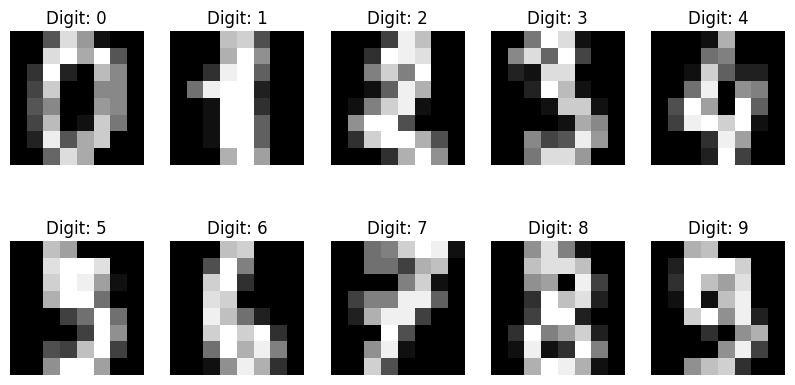

In [ ]:
# Visualizar algunas imágenes
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Digit: {label}')
    ax.axis('off')

plt.show()

In [ ]:
# Ahora si comparamos images con data, veremos que son iguales
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [ ]:
image = np.reshape(digits.data[10],(8,8))
image

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

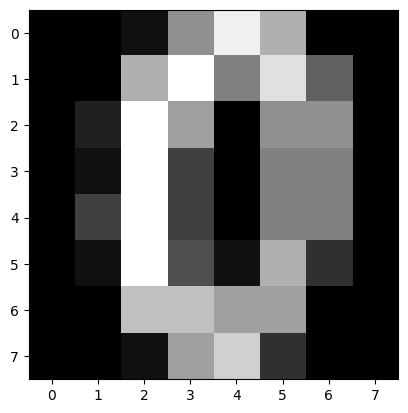

In [ ]:
plt.imshow(image,cmap='gray')

In [ ]:
digits.target[10]

0

## Split de datos en train y test

In [ ]:
# Ahora dividiremos el data set en dos partes, la primera para el entrenamiento y la segunda para el test
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

## Entrenamiento de modelo

In [ ]:
# Entrenamos el modelo de regresión logística
logistic_regresion_model = LogisticRegression(max_iter=10000, solver='lbfgs')
logistic_regresion_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

## Evaluación del modelo

In [ ]:
# Haremos las predicciones, esto nos dará como resultado a que digito corresponde cada imagen del test
predictions = logistic_regresion_model.predict(x_test)

In [ ]:
# Mediremos la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.97


💡 **Conclusion 01:** Esto significa que el modelo clasifica correctamente el 97% de las veces.

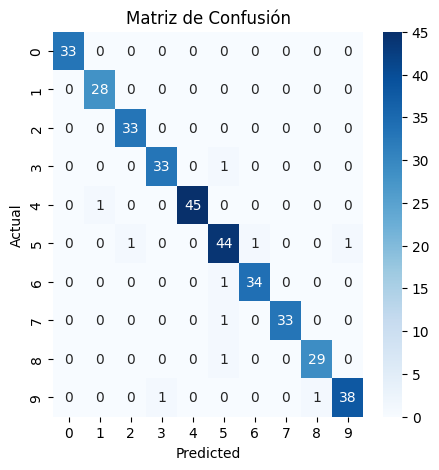

In [ ]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

💡 **Conclusion 02:** Esta métrica nos ayuda a saber la relación que tienen los valores reales con los predichos, por ejemplo si vemos el valor actual 5, tiene 44 valores predecidos correctamente y 3 incorrectas. en general vemos que la mayoría de valores han sido correctamente predichas.

In [ ]:
# Mostrar el informe de clasificación
class_report = classification_report(y_test, predictions)
print('Informe de Clasificación:')
print(class_report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



💡 **Conclusion 03:** Esta métrica nos da diferente tipo de información.
1. La precision, nos ayuda a saber la proporción de los verdaderos positivos sobre el total de valores predichos. Esto nos ayuda saber que tan bien predice el modelo. En este caso vemos que la mayoría de los caso pasa el 97%.
2. El recall, mide la proporcion de los verdaderos positivos frente a los valores reales, es decir (VerdaderoPositivo / VerdaderosPositivo+FalsosNegativos), este valor nos ayuda a saber que tan bien el modelo detecta los verdaderos positivos. En este caso vemos que la clase 9 tiene un valor de 95%.
3. El f1-score, nos ayuda a saber la media armonica de la precision y el recall. Nos ayuda ver de una manera rapida una metrica que toma en cuenta las dos anteriores. En este reporte vemos que todos superan el 90%.
4. El support, es el número de ocurrencias de cada clase

<Axes: >

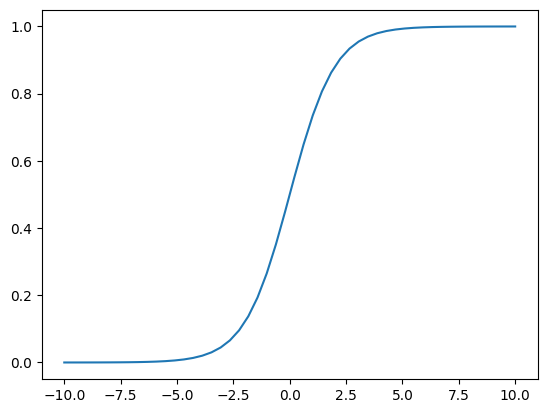

In [ ]:
x =  np.linspace(-10,10,50)
y = 1/(1 + np.exp(-x))
sns.lineplot(x=x, y=y)